In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from  sqlalchemy import create_engine
from scipy.stats import ttest_ind
from scipy.stats import t

warnings.filterwarnings("ignore")
sns.set_style("dark")

In [2]:

username = "root"        
password = "root"
host = "localhost"     
port=3306            
database_name = "vendor_sales"

# Create database connection 
engine  = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database_name}") 


In [3]:
df=pd.read_sql("select * from vendor_sales_summary",engine)

# Exploratry Data Analysis
- we analyze theresu,tant table to gain insight into the distribution of each column . this hwlp us to undersatnd data pattens , identify anomalies , and ensure data quanlity before proceding with further analysis.

In [4]:
#summery statistics 
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollar,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,StockTurnOver,ProfitMargin,SalesPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10514.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,3077.482136,4.223907e+04,18793.783627,1774.226259,61433.763214,1.213238e+04,1.706793,-15.885227,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10952.851391,1.676553e+05,44952.773386,10975.582240,60938.458032,4.622434e+04,6.020460,447.289882,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,0.000000,-23730.638953,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,0.807229,15.353839,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,0.981529,30.778375,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073824e+04,1929.250000,2.839692e+04,16059.562500,418.650000,79528.990000,8.660200e+03,1.039342,40.210967,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,274.500000,99.716657,352.928571


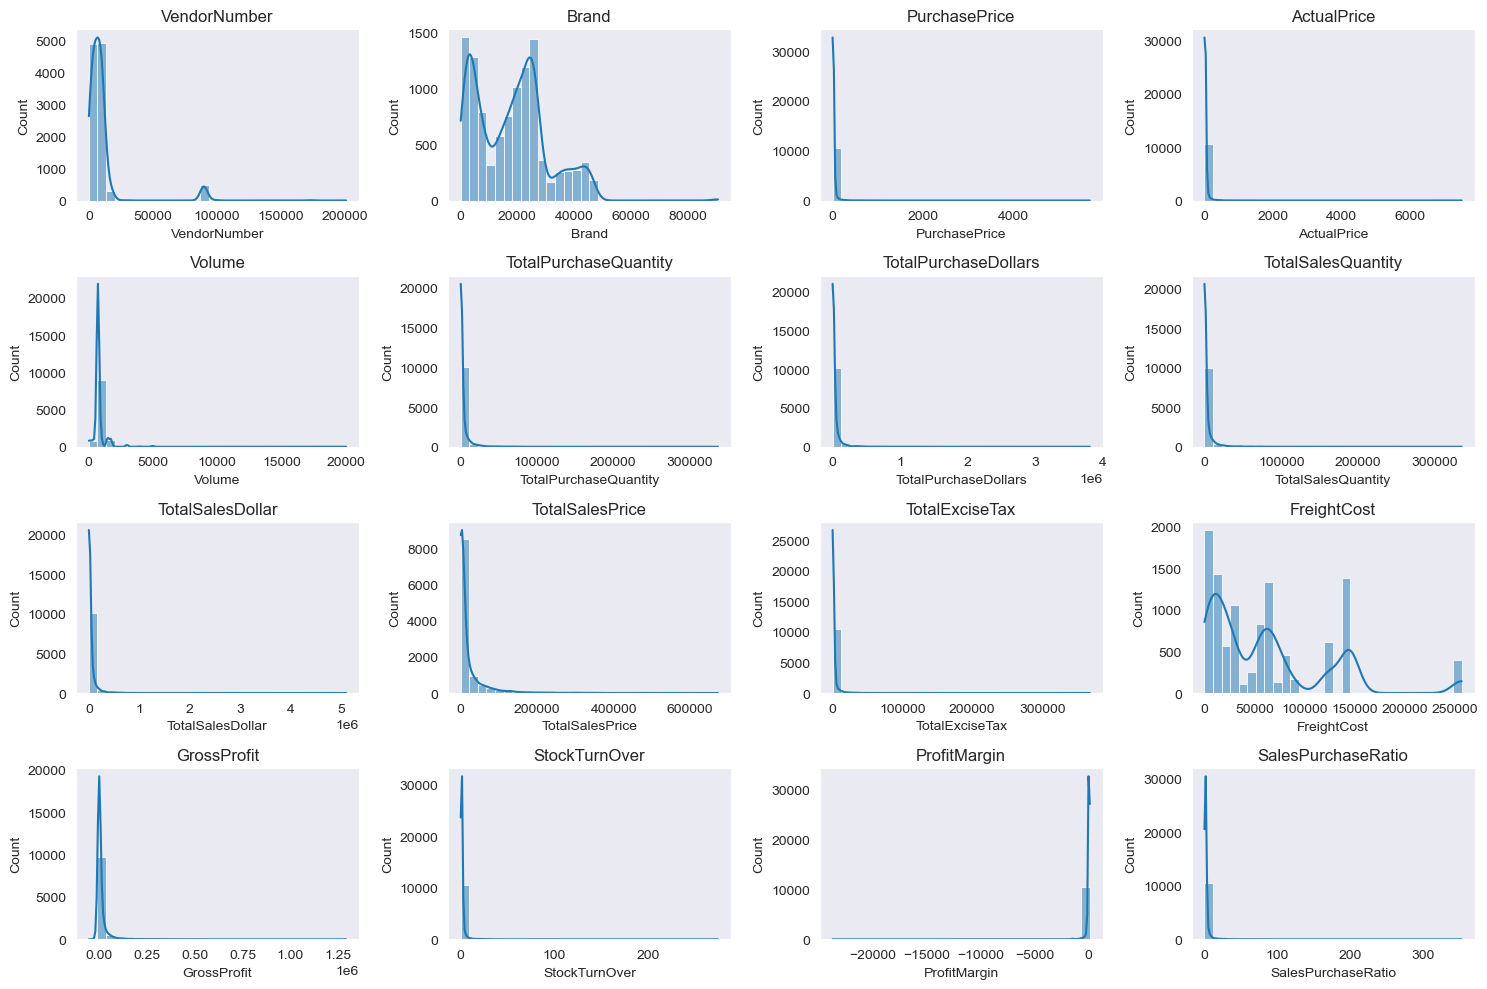

In [5]:
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()



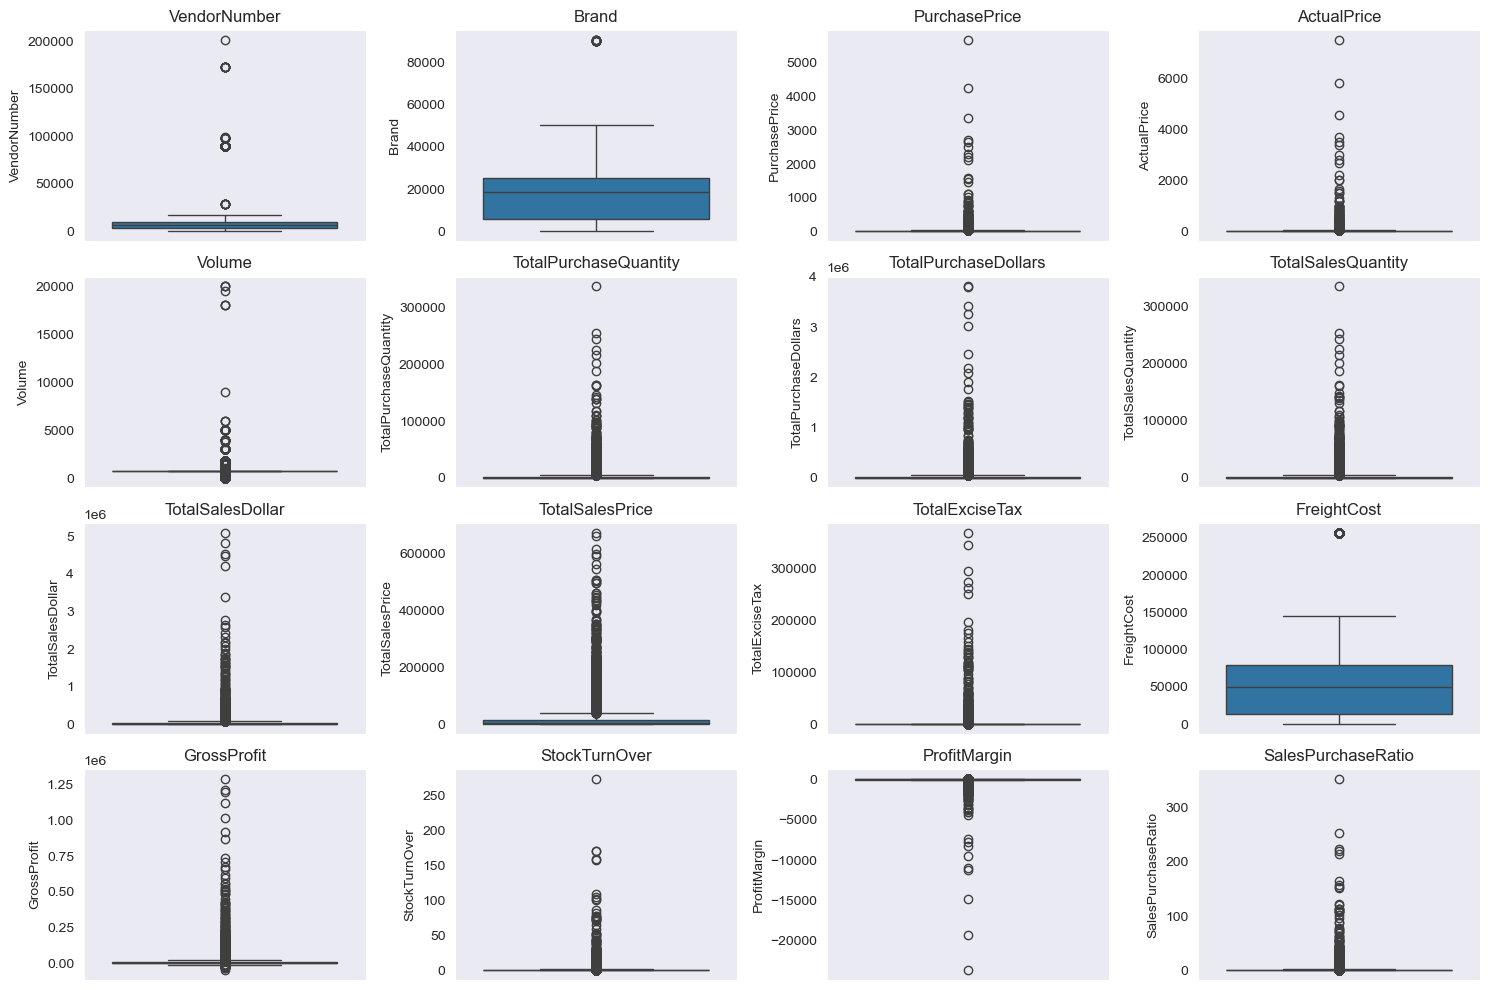

In [6]:
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col], )
    plt.title(col)
plt.tight_layout()
plt.show()

# summery Statistic Insight 

#### negative & Zero Values 
- Gross profit : Minimum value is -5.2002.78 , indicating loss . Some productsor transections may b selling at loss due to high cost or selling at discounts lower than the prouct price .
- Profit Margin : Has a minimum null which suggest case where revenue is zero or even Lower than cost . and except of null the minimum is -23730.638953	 , which is also  indicates a loss, may the costs exceeded the revenue.
- Total Sales Quantity & sales Dollars : minimum value are  0 , meaning some , products were purchased but never sold .This could be slow moving or obsolete stock .


#### Outliers  Indiacated by Hign Standard Deviations;
- purachase & actual prices :the max values(5681.81 & 7499.99 ) are significantly higher the mean (24.39 & 35.64)  indiacting potential premium products
- freight Cost :huge variation , from 0.09 to 257032.75 suggests logistics ineffiencies or bulk shipments .
- Stock turnover :ranges from 0 to 274.5 implying some products sells extremely fast while others remain in stock indefinitely . stock more than 1 indicate sold quality is higher then purchased quality due to either sales are being fulfilled from older stock .

In [7]:
df1=pd.read_sql("""
select * from vendor_sales_summary 
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0
""",engine)

In [8]:
df1

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollar,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,StockTurnOver,ProfitMargin,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,0.979108,25.297693,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,0.976890,21.062810,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,0.998575,24.675786,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,0.993703,27.139908,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,0.983556,28.412764,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,2.500000,83.448276,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,22.333333,96.436186,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,1.000000,25.252525,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,72.000000,98.974037,97.469388


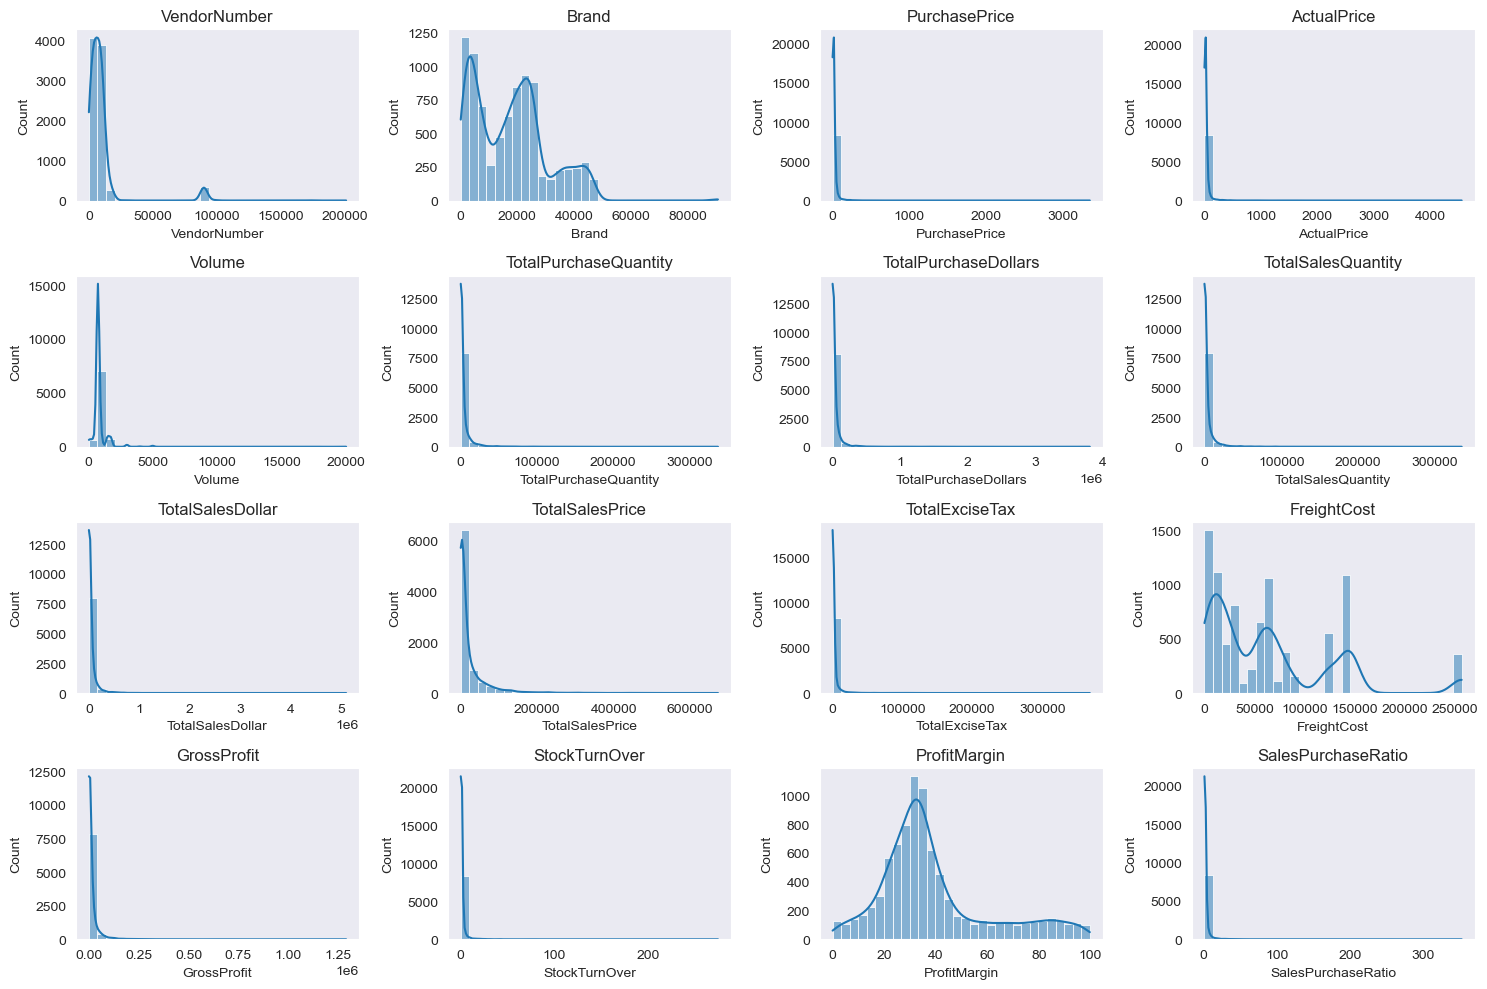

In [9]:
numerical_cols=df1.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df1[col],kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

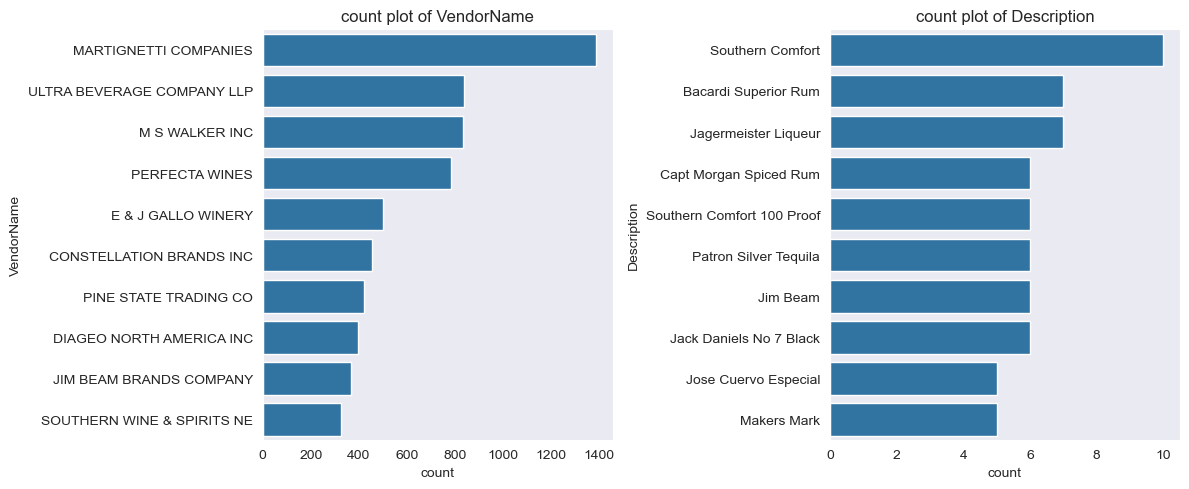

In [10]:
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i ,col  in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()



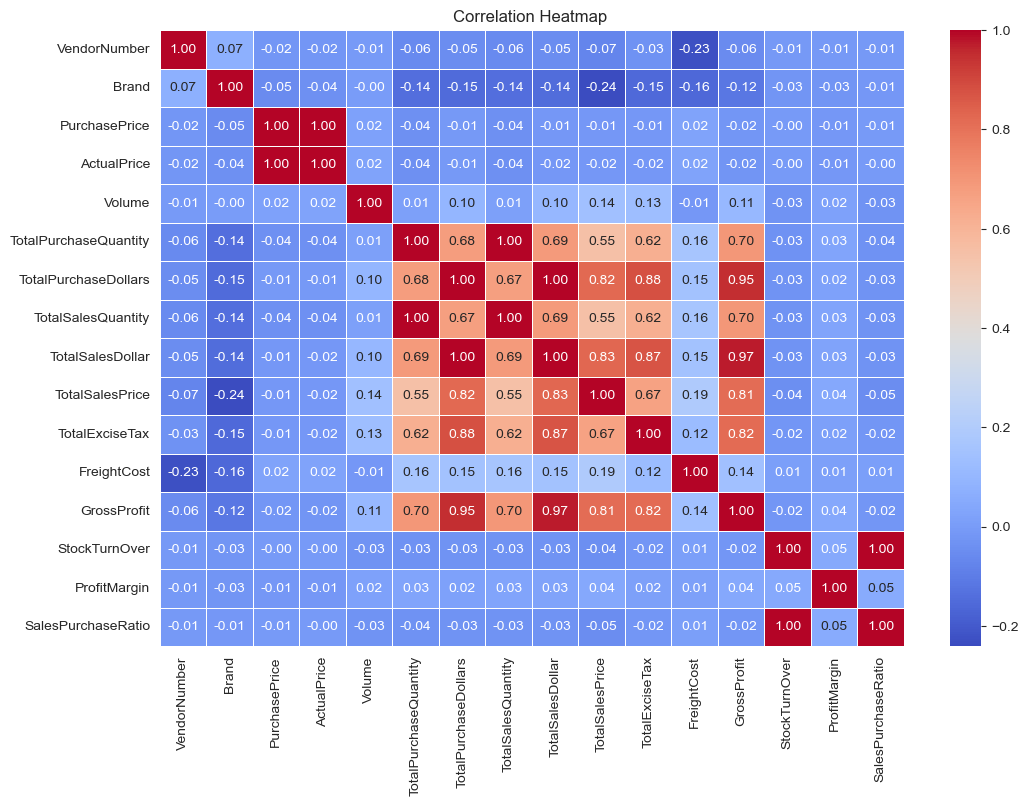

In [ ]:
plt.figure(figsize=(12,8))

correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
    


plt.title("Correlation Heatmap ",)
plt.show()

# Corealtion Insight 
- purchasePrice has weak correaltion with TotalsalesDollars(-0.01) and GrossProfit(-0.016) suggestting that price variation do not significantly impact sales revenue or profit
- strong corelation between toatl purchase quantity and total sales quantity (0.999), confirming efficent inventry turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases , margine decrease , possibily due to competitive pricing pressures.
- StockTurnover has weak negative correlation with both GrossProfit (-0.038) abd profitMargine (-0.055) indicating the faster Turnover does not necessarily result in higher profitability

# Data Anlaysis
##### Identifying Brands that need promotional or pricing Adjustments Which Exibit lower sales proformance but higher profit margins.

In [12]:
brand_performance=df1.groupby('Description').agg({
    "TotalSalesDollar":"sum",
   "ProfitMargin" :"mean"
                              }).reset_index()

In [13]:
low_sales_threshold=brand_performance["TotalSalesDollar"].quantile(0.15)
high_margin_threshold=brand_performance["ProfitMargin"].quantile(0.85)


In [14]:
low_sales_threshold

np.float64(560.299)

In [15]:
high_margin_threshold

np.float64(64.97017552750111)

In [16]:
target_brands=brand_performance[
(brand_performance["TotalSalesDollar"]<=low_sales_threshold) &
(brand_performance["ProfitMargin"]>=high_margin_threshold)
]
print("Brand with Low sales but high Margine")
display(target_brands.sort_values('TotalSalesDollar'))

Brand with Low sales but high Margine


,Description,TotalSalesDollar,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
brand_performance=brand_performance[brand_performance['TotalSalesDollar']<10000]

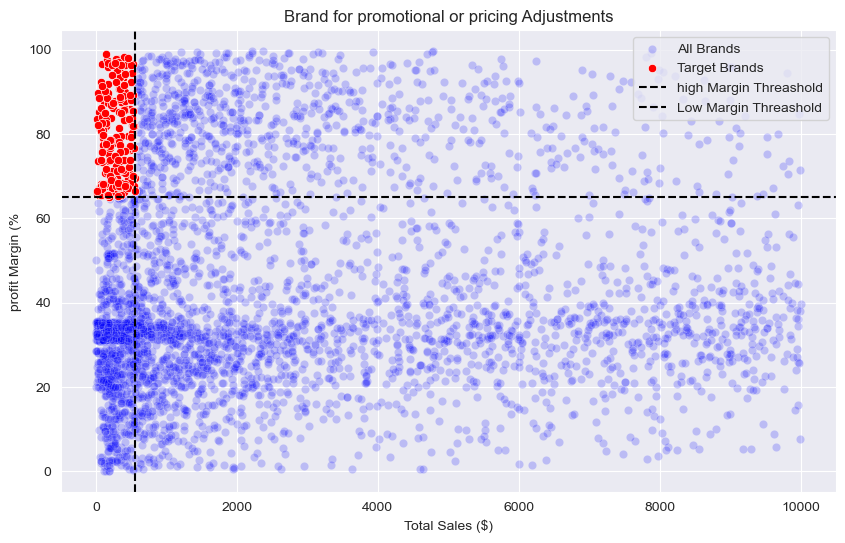

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollar',y='ProfitMargin',color='blue',label="All Brands" ,alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollar',y='ProfitMargin',color='red',label="Target Brands")

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='high Margin Threashold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='Low Margin Threashold')

plt.xlabel("Total Sales ($)")
plt.ylabel("profit Margin (%")
plt.title("Brand for promotional or pricing Adjustments")
plt.legend()
plt.grid()
plt.show()

#### which vendor and brand demonstrate  highest sales performance 

In [19]:
top_vendors=df1.groupby("VendorName")["TotalSalesDollar"].sum().nlargest(10)
top_brands=df1.groupby("Description")["TotalSalesDollar"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollar, dtype: float64

In [20]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollar, dtype: float64

In [21]:
def format_dollar(value):
    if value>=1000000:
        return f"{value/1000000:.2f}M"
    elif value >= 1000:
        return f"{value/1000:.2f}k"
    else :
        return str(value)

In [22]:
top_brands.apply(lambda x :format_dollar(x))
top_vendors.apply(lambda x :format_dollar(x))
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollar, dtype: float64

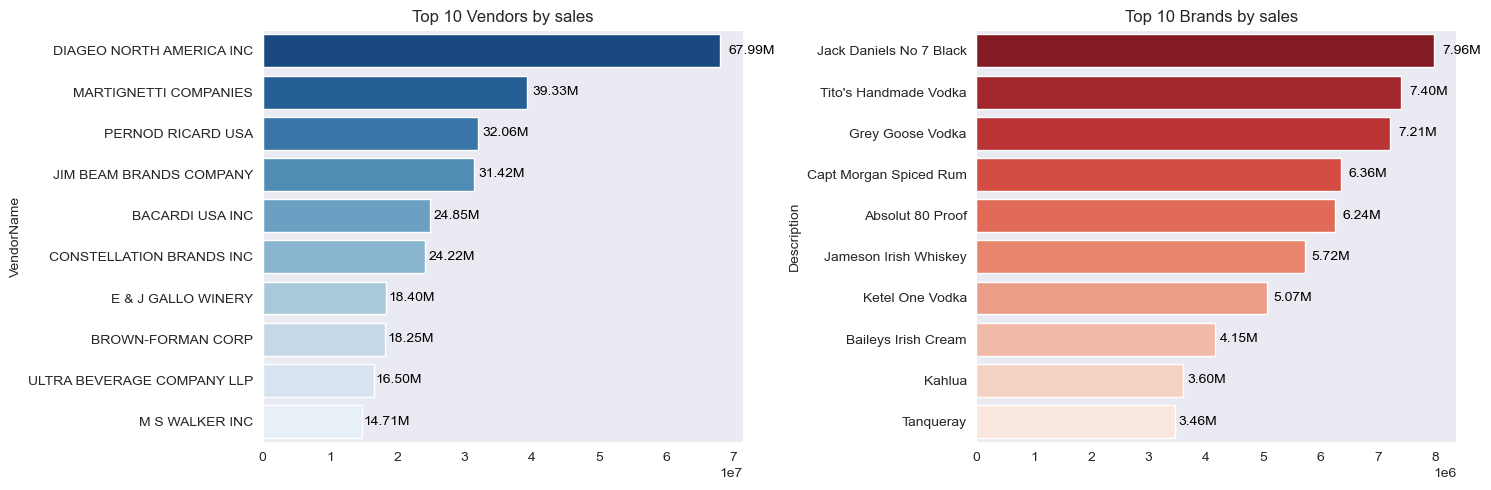

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
axa=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors by sales")

for bar in axa.patches:
    axa.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollar(bar.get_width()),
             ha="left", va="center", fontsize=10, color='black')

# plot for Top Brands
plt.subplot(1,2,2)
axb = sns.barplot(
    y=top_brands.index.astype(str),  
    x=top_brands.values,            
    palette="Reds_r"
)

plt.title("Top 10 Brands by sales  ")


for bar in axb.patches:
    axb.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollar(bar.get_width()),
             ha="left", va="center", fontsize=10, color='black')


plt.tight_layout()
plt.show()

# which vendors contribute the most to total purchase dollars

In [24]:
vendor_performance=df1.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollar':'sum'
    
}).reset_index()

In [25]:
vendor_performance['PurchaseContribution%']=(vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [26]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)


In [27]:
top_vendor=vendor_performance.head(10)

In [28]:
top_vendor['TotalPurchaseDollars']=top_vendor['TotalPurchaseDollars'].apply(format_dollar)
top_vendor['GrossProfit']=top_vendor['GrossProfit'].apply(format_dollar)
top_vendor['TotalSalesDollar']=top_vendor['TotalSalesDollar'].apply(format_dollar)

In [29]:
top_vendor

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollar,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [30]:
top_vendor['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [31]:
top_vendor["Cumulative_Contribution"]=top_vendor['PurchaseContribution%'].cumsum()

In [32]:
top_vendor

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollar,PurchaseContribution%,Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


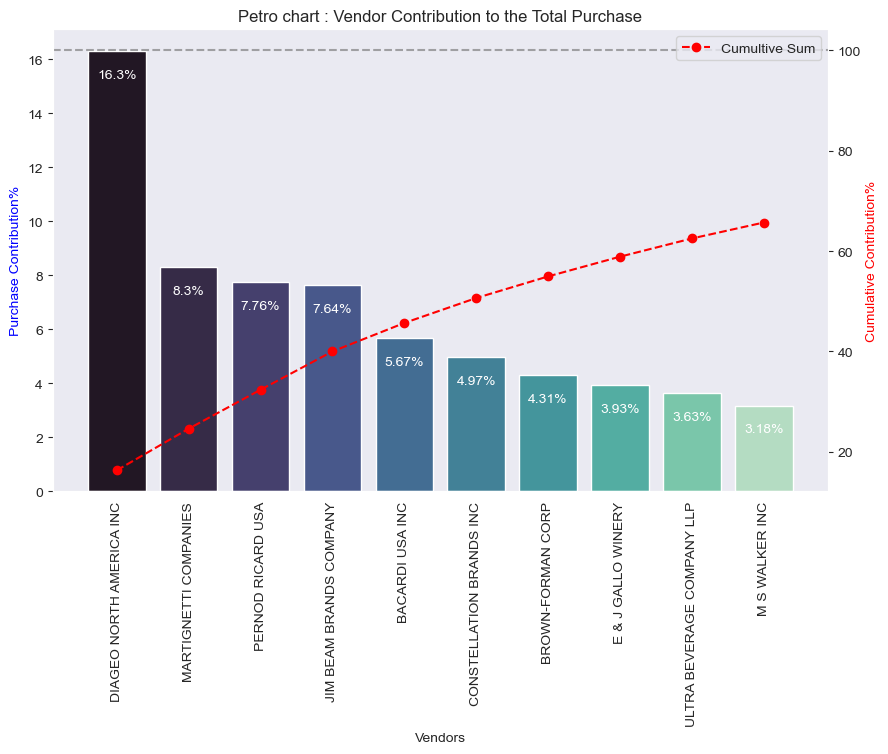

In [33]:
fig,ax1=plt.subplots(figsize=(10,6))

sns.barplot(x=top_vendor['VendorName'],y=top_vendor["PurchaseContribution%"],palette="mako",ax=ax1)

for i,value in enumerate(top_vendor['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center', fontsize=10,color='white')

ax2=ax1.twinx()
ax2.plot(top_vendor['VendorName'],top_vendor['Cumulative_Contribution'],color='red',marker='o',linestyle='dashed',label='Cumultive Sum')

ax1.set_xticklabels(top_vendor['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution%',color='blue')
ax2.set_ylabel('Cumulative Contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Petro chart : Vendor Contribution to the Total Purchase')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total percurement is dependent on the top vendors?

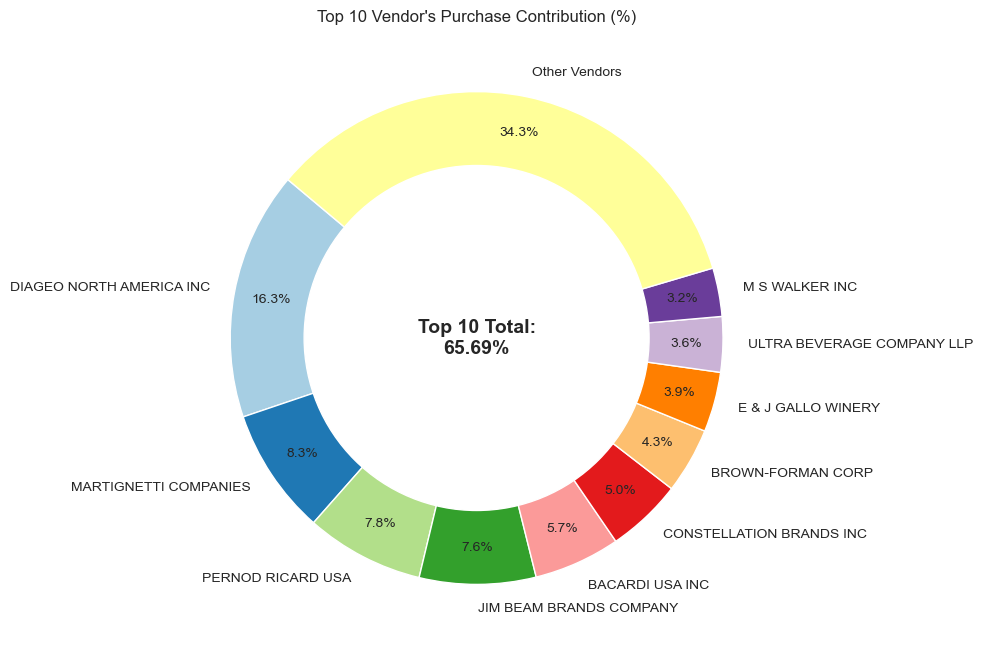

In [34]:
vendors=list(top_vendor['VendorName'].values)
purchase_contribution=list(top_vendor['PurchaseContribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

vendors.append('Other Vendors')
purchase_contribution.append(remaining_contribution)

fig,ax=plt.subplots(figsize=(8,8))

# Donut chart
wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Add white circle in center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add text in middle
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", 
         fontsize=14, fontweight='bold', ha='center', va='center')

# Title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

plt.show()


### Dees purchasing in bulk reduce  the unit price , and what is the optimal purchases ,volume  for cost saving ?

In [35]:
df1['UnitPurchasePrice']=df1["TotalPurchaseDollars"]/df1["TotalPurchaseQuantity"]

In [36]:
df1['OrderSize']=pd.qcut(df1["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [37]:
df1.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollar',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'StockTurnOver', 'ProfitMargin', 'SalesPurchaseRatio',
       'UnitPurchasePrice', 'OrderSize'],
      dtype='object')

In [38]:
df1.groupby(['OrderSize'])[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


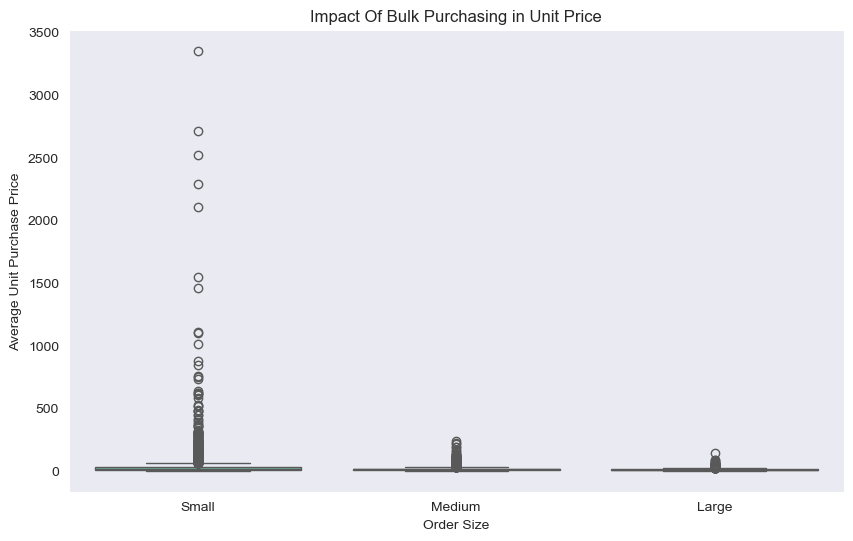

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1,x='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title("Impact Of Bulk Purchasing in Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


- vendor buying (Large Order Size) get the lowest unit price ($10.78 unit ), meaning higher margins if they can manage inventory efficienty.
- The price difference between Small and Large order is substential (-72% reduction in unit cost)
- Thissuggests that bulk pricing strategies sucessfully encourage vendors to purchase in larger volumes ,leading ro higher overall sales despite lower per unit revenue .

### Which Vendors have low inventory  turnover , indicating excess stock and slow-moving products ?

In [40]:
df1[df1["StockTurnOver"]<1].groupby("VendorName")[["StockTurnOver"]].mean().sort_values("StockTurnOver",ascending =True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much capital is lock in unsold inventory per vendor , and which vendor contribute the most to it ?

In [41]:
df1['UnsoldInventoryValue']=(df1["TotalPurchaseQuantity"]-df1["TotalSalesQuantity"])*df1["PurchasePrice"]
print('Total Unsold Capital :',format_dollar(df1["UnsoldInventoryValue"].sum()))

Total Unsold Capital : 2.71M


In [42]:
#Aggregate loked per vendor 
inventory_value_per_vendor=df1.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#sort vendors with highest locked capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollar)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


### what is the 95% confidence intervals for profit margins of top-performing and low performing vendors.

In [43]:
top_threshold=df1["TotalSalesDollar"].quantile(0.75)
low_threshold=df1["TotalSalesDollar"].quantile(0.25)

top_vendor=df1[df1["TotalSalesDollar"]>= top_threshold]["ProfitMargin"].dropna()
low_vendor=df1[df1["TotalSalesDollar"]<=low_threshold]['ProfitMargin'].dropna()

In [46]:
def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard Error
    t_critical = t.ppf((1 + confidence) / 2, df=len(data) - 1) 
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


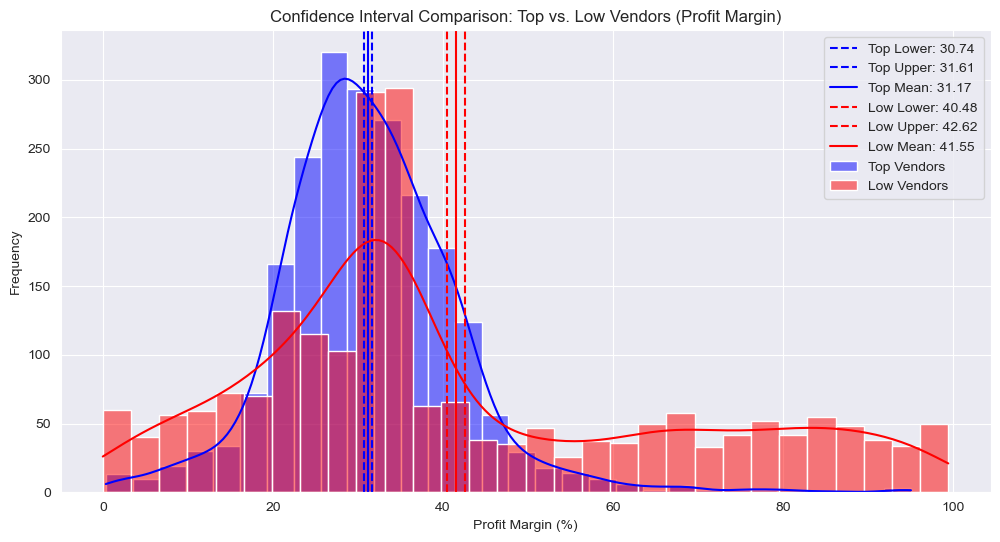

In [50]:
# -----------------------------
# CI Calculations
# -----------------------------
top_mean, top_lower, top_upper = confidence_interval(top_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_vendor)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# -----------------------------
# Plotting
# -----------------------------
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendor, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendor, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

###Research Question:
###Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypotheses:

H₀ (Null Hypothesis):
There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis):
The mean profit margins of top-performing and low-performing vendors are significantly different.

In [ ]:
# Perform t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ There is a significant difference between Top and Low vendors.")
else:
    print("❌ No significant difference between Top and Low vendors.")